# Introduksjon til maskinlæring i praksis

I forrige semester så vi på vektorer og matriser, og fant en matrise som kan gjøre om rette bokstaver til kursiv. 

Grunnen til at vi så på dette, er at matriser og vektorer spiller en stor rolle når vi jobber med maskinlæring, og spesielt når vi jobber med nevrale nett. Litt forenklet kan vi si at vi bruker vektorer til å representere data og matriser til å representere nevrale nettverk. Vi skal utvide og komplisere dette litt senere, men for nå kan vi tenke slik på det. 

Vi begynner med å repetere litt på matriser og vektorer. (Se eget notat på timeplanen). 

## Nå skal vi finne matrisen med maskinlæring i stedet

Jeg har laget et datasett med punktbeskrivelser av bokstaver som er rette og i kursiv. Dataene kommer i par, slik at vi vet hvilken rett bokstav som hører til hvilken skjev bokstav. Dette skal vi bruke til å trene et nettverk for kursivbokstaver. Grunnen til at jeg bruker dette datasettet som eksempel er at dere allerede har gjort en oppgave der dere selv har prøvd å finne en matrise, og dermed har et visst forhold til hva som foregår. 

For dem som er interessert ligger scriptet som lager bokstavene i en fil som heter `create_letter_dataset.py`. 

Under lager vi en maskinlæringsalgoritme som trenes opp til å lage kursivbokstaver. 

## Treningsdata
Vi begynner med å se på de dataene som vi skal trene kursiv-algoritmen vår med. 

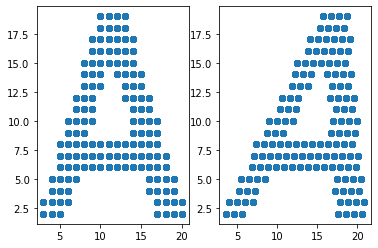

In [1]:
import json 
import matplotlib.pyplot as plt
import numpy as np

alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZÆØÅ"

straight_letters = json.load(open("../resources/straight_letters.json", "r"))
italic_letters = json.load(open("../resources/italic_letters.json", "r"))

for key in straight_letters.keys():
    straight_letters[key] = np.asarray(straight_letters[key])
    italic_letters[key] = np.asarray(italic_letters[key])

letter = "A"
plt.subplot(1, 2, 1)
plt.scatter(straight_letters[letter][:,0], straight_letters[letter][:,1])
plt.subplot(1, 2, 2)
plt.scatter(italic_letters[letter][:,0], straight_letters[letter][:,1])

Over ser vi et eksempel på bokstaven `A` representert som en punktsky både i rett og kursiv. Nå skal vi bruke maskinlæring til å finne den matrisen som kan transformere fra den rette til den skjeve versjonen av bokstaven. 

## Maskinlæringsmodell

For å kunne gjøre backpropagation, altså finne ut hvordan vi skal justere vektene i nettverket for at det skal bli bedre på å gjøre prediksjoner som er i samsvar med treningsdataene, bruker vi et bibliotek som heter `jax`. Det finnes andre biblioteker vi kunne brukt, slik som PyTorch etter Tensorflow. 

In [2]:
import jax.numpy as jnp
from jax import grad
from jax import random

/Users/henriasv/.pyenv/versions/3.9.9/envs/hon1000/lib/python3.9/site-packages/jax/_src/lib/__init__.py:32: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


Vi kan implementere maskinlæringsalgoritmen i følgende rekkefølge. Koden under viser det endelige resultatet. 

1. Skrive opp funksjonene
2. Fylle funksjonenen
3. Initialisere matrisen, printe
4. Treningsløkke med 3 epoker, printe matrise, visualisere punktsky
5. Plotte loss. Kjøre flere epoker, plotte loss igjen. 
6. Visualisere punktsky
7. Animere punktsky

In [7]:
def init_random_weights(size):
    return random.normal(random.PRNGKey(3), size)

def predict(weights, inputs):
    outputs = jnp.matmul(weights, inputs)
    return outputs

def loss(weights, inputs, targets):
    predictions = predict(weights, inputs)
    return jnp.mean((predictions-targets)**2)
    
def update(weights, x, y, step_size=0.003):
    grads = grad(loss)(weights, x, y) # Backpropagation
    return weights - step_size * grads

# Vi trener nettet kun med punktene i bokstaven A     
inputs  = jnp.array(straight_letters["A"].T)
targets = jnp.array(italic_letters["A"].T)

weights = init_random_weights((2,2))

fig, ax = plt.subplots() # vent 2
ims = [] # vent 2

from IPython.display import HTML # vent 2
import matplotlib.animation as animation # vent 2

loss_list = [] # vent 1

for i in range(30): # Prøv først med 3 epoker, print matrisen. Deretter med 100 og plott matrisen. 
    weights = update(weights, inputs, targets)
    loss_list.append(loss(weights, inputs, targets)) # vent 1
    out = predict(weights, inputs).T
    im = ax.scatter(out[:,0], out[:,1], c="k") # vent 2
    ims.append([im]) # vent 2

print(weights)

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                    repeat_delay=1000) # vent 2
plt.close()
HTML(ani.to_jshtml())

[[1.0806346  0.20374385]
 [0.11557305 0.86203676]]


Weights: 
 [[1.0806346  0.20374385]
 [0.11557305 0.86203676]]


Text(0, 0.5, 'loss')

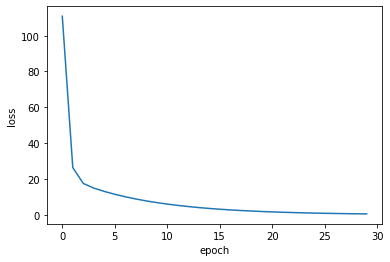

In [12]:
print("Weights: \n", weights)
plt.plot(loss_list)
plt.xlabel("epoch")
plt.ylabel("loss")

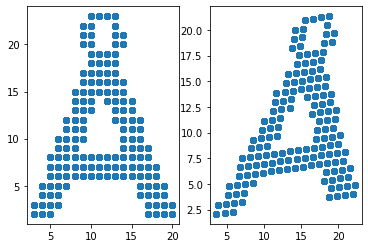

In [14]:
def draw_letter(letter):
    out = straight_letters[letter]
    plt.scatter(out[:,0], out[:,1])
    
def draw_italic_letter(letter):
    out = predict(weights, straight_letters[letter].T).T
    plt.scatter(out[:,0], out[:,1])

def draw_both(letter):
    plt.subplot(1,2,1)
    draw_letter(letter)
    plt.subplot(1, 2, 2)
    draw_italic_letter(letter)
    
draw_both("Å")

Hva gjør denne modellen med en vanlig graf som vi er vant til å se på?

## Funker algoritmen på alle bokstavene? 

In [16]:
# Funker algoritmen på alle bokstavene? 
fig, ax = plt.subplots()
ims = []

from IPython.display import HTML
import matplotlib.animation as animation

for letter in alphabet:
    inputs  = jnp.array(straight_letters[letter].T)
    out = predict(weights, inputs).T
    im = ax.scatter(out[:,0], out[:,1], c="k")
    ims.append([im])
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                    repeat_delay=1000)
plt.close()
HTML(ani.to_jshtml())


## Hva gjør algoritmen med en vanlig matematisk funksjon? 

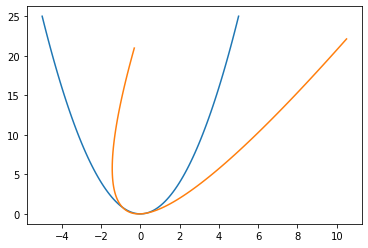

In [17]:
def f(x): 
    return x**2

x = np.linspace(-5, 5, 100)
y = f(x)

plt.figure()
plt.plot(x, y)

input=np.asarray([x, y])

predictions = predict(weights, input).T
plt.plot(predictions[:,0], predictions[:,1])

# Teachablemachine 

Til slutt skal vi se på et ferdiglaget bildegjenkjenningsprogram som lar oss trene opp et nevralt nett til å skille mellom forskjellige objekter. 

1. Gå sammen 3–4 stykker i hver gruppe.
2. Gå inn på https://teachablemachine.withgoogle.com/train/image
3. Tren en modell som skal se forskjell på dere og sjekk at den fungerer 
4. Prøv så å manipulere modellen. Få den til å gjøre feil. Tren eventuelt på nytt for å gjøre den ustabil. 



*Tenk for eksempel tilbake til foredraget til Anders Hansen om ustabilitet og hva modellene egentlig lærer*